In [ ]:
#first we import of the libraries
import math
from scipy import signal
from PIL import Image
import numpy as np
from numpy import *
from matplotlib import pyplot as plt
from pylab import *
import cv2
import random

In [ ]:
#Load given images
Image1 = cv2.imread('/content/Q2-1.png',cv2.IMREAD_GRAYSCALE)
Image2 = cv2.imread('/content/Q2-2.png',cv2.IMREAD_GRAYSCALE)

In [ ]:
def gaussian_filter(Image):
  Smooth = cv2.GaussianBlur(Image,(3,3),0)
  return Smooth

In [ ]:
def derivative_of_image(mode,Image1,Image2):
  if (str(mode) == 'x'):
    #compute the derivate toward x using filters(padding is used also for getting the output with the same size of the input)
    partial_derivative = signal.convolve2d(Image1,[[-0.25,0.25],[-0.25,0.25]],'same') + signal.convolve2d(Image2,[[-0.25,0.25],[-0.25,0.25]],'same')
  elif(str(mode) == 'y'):
    #derivative toward y
    partial_derivative = signal.convolve2d(Image1,[[-0.25,-0.25],[0.25,0.25]],'same') + signal.convolve2d(Image2,[[-0.25,-0.25],[0.25,0.25]],'same')
  else:
    partial_derivative = signal.convolve2d(Image1,[[0.25,0.25],[0.25,0.25]],'same') + signal.convolve2d(Image2,[[-0.25,-0.25],[-0.25,-0.25]],'same')
  return partial_derivative


In [ ]:
def neighborhood_derivatives(Ix,Iy,It,i,j):
  #As we already know in lucas kanade method we use a 3*3 window as a neighborhood for each of the pixels
  #now for having the matrix A of lucas kanade equation we have to gather the partial derivates of all 9 neighbors of a pixel(including itself)
  IX = ([Ix[i-1,j-1],Ix[i,j-1],Ix[i-1,j-1],Ix[i-1,j],Ix[i,j],Ix[i+1,j],Ix[i-1,j+1],Ix[i,j+1],Ix[i+1,j-1]])
  IY = ([Iy[i-1,j-1],Iy[i,j-1],Iy[i-1,j-1],Iy[i-1,j],Iy[i,j],Iy[i+1,j],Iy[i-1,j+1],Iy[i,j+1],Iy[i+1,j-1]])
  IT = ([It[i-1,j-1],It[i,j-1],It[i-1,j-1],It[i-1,j],It[i,j],It[i+1,j],It[i-1,j+1],It[i,j+1],It[i+1,j-1]])
  return IX , IY , IT



In [ ]:
def Lucas_Kanade(Input_Image1,Input_Image2):
 #covert images into a 2D array form
 img1 = np.array(Input_Image1)
 img2 = np.array(Input_Image2)
 #take the size of the images
 S = np.shape(img1)
 img1_smooth = gaussian_filter(img1)
 img2_smooth = gaussian_filter(img2)
 Ix = derivative_of_image('x',img1_smooth,img2_smooth)
 Iy = derivative_of_image('y',img1_smooth,img2_smooth)
 It = derivative_of_image('t',img1_smooth,img2_smooth)
 #Extract important features
 features = cv2.goodFeaturesToTrack(img1_smooth,10000,0.01,10)
 feature = np.int0(features)
 #plot the two input images for later comparison with optical flows
 plt.subplot(1,3,1)
 plt.title('Image 1')
 plt.axis('off')
 plt.imshow(img1_smooth, cmap = cm.gray)
 plt.subplot(1,3,2)
 plt.title('Image 2')
 plt.axis('off')
 plt.imshow(img2_smooth, cmap = cm.gray)
 for i in feature:
  x,y = i.ravel()
  cv2.circle(img1_smooth,(x,y),3,0 ,-1)
 #define optical flow parameters
 u = v = np.nan*np.ones(S)
 # Calculating the u and v arrays for the features obtained
 for l in feature:
  j,i = l.ravel()
  IX,IY,IT = neighborhood_derivatives(Ix,Iy,It,i,j)
	#Solving least square with pseudo inverse of matrix A
  A = (IX, IY)
  A = np.matrix(A)
  AT = np.array(np.matrix(A)) # transpose of A
  A = np.array(np.matrix.transpose(A))
  ATA = np.dot(AT,A) #Psedudo Inverse
  ATA_inverse = np.linalg.pinv(ATA)
  ATA_inv_AT = np.dot(ATA_inverse,AT)
  (u[i,j],v[i,j]) = np.dot(ATA_inv_AT,IT) # we have the vectors with minimized square error

 t=2 # setting a threshold to plot the vectors
 plt.subplot(1,3,3)
 plt.title('Optical Flow of good features')
 plt.imshow(img1,cmap = cm.gray)
 plt.axis('off')
 #only mark the optical flows with vector of size larger than a threshold
 for i in range(S[0]):
  for j in range(S[1]):
    if abs(u[i,j])>t or abs(v[i,j])>t:
     plt.arrow(j,i,v[i,j],u[i,j],head_width = 5, head_length = 5, color = 'b')
 plt.show()




<ipython-input-45-4b9ac91973f9>:14: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  feature = np.int0(features)


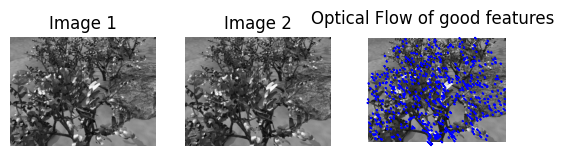

In [ ]:
Lucas_Kanade(Image1,Image2)